In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.covariance import EmpiricalCovariance
from skimage.feature import graycomatrix
from skimage import img_as_ubyte

In [3]:
sns.set_style(
    style='darkgrid',
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

In [4]:
data = pd.read_csv('./data/train.csv')
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
data['target'].unique()

# Univariate Analysis


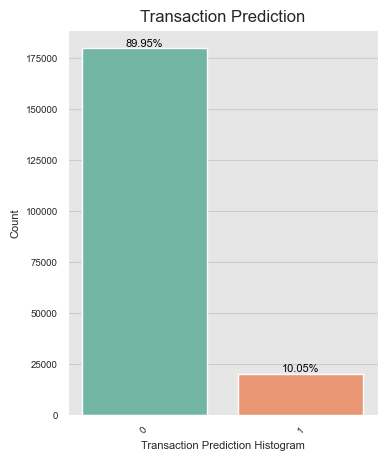

In [8]:
# target variable analysis
plt.figure(figsize=(4, 5))
sns.countplot(x="target", data=data, palette='Set2', ax=plt.gca())
# data[target].value_counts().plot(kind='bar', title='Body Level')
# add percentages
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}%'.format(100*p.get_height()/len(data)),
                   fontsize=8, color='black', ha='center', va='bottom')
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Transaction Prediction Histogram', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.title('Transaction Prediction')
plt.axis('tight')
plt.savefig('./images/data_analysis/transaction_distribution.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [9]:
X = data.drop(['ID_code', 'target'], axis=1)  
y = data['target']

In [10]:
# getting the min and max values of each feature
min_values = X.min()
max_values = X.max()
print("Min values of each feature: \n", min_values)
print("Max values of each feature: \n", max_values)

Min values of each feature: 
 var_0       0.4084
var_1     -15.0434
var_2       2.1171
var_3      -0.0402
var_4       5.0748
            ...   
var_195    -5.2610
var_196   -14.2096
var_197     5.9606
var_198     6.2993
var_199   -38.8528
Length: 200, dtype: float64
Max values of each feature: 
 var_0      20.3150
var_1      10.3768
var_2      19.3530
var_3      13.1883
var_4      16.6714
            ...   
var_195     4.2729
var_196    18.3215
var_197    12.0004
var_198    26.0791
var_199    28.5007
Length: 200, dtype: float64


In [11]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [12]:
# getting the maen and std values of each feature
mean_values = X.mean(axis=0)
std_values = X.std(axis=0)
# print("Mean values of each feature: \n", mean_values)
# print("Std values of each feature: \n", std_values)

In [13]:
# apply this equation for each feature separately to standardize the data
X = (X - mean_values) / std_values

In [14]:
# getting the min and max values of each feature
min_values = X.min()
max_values = X.max()
print("Min values of each feature: \n", min_values)
print("Max values of each feature: \n", max_values)

Min values of each feature: 
 var_0     -3.378731
var_1     -3.312502
var_2     -3.255750
var_3     -3.345894
var_4     -3.698694
             ...   
var_195   -3.581230
var_196   -3.027469
var_197   -3.198216
var_198   -3.178875
var_199   -3.403546
Length: 200, dtype: float64
Max values of each feature: 
 var_0      3.169383
var_1      2.964022
var_2      3.270789
var_3      3.128132
var_4      3.445811
             ...   
var_195    3.088760
var_196    2.936758
var_197    3.355205
var_198    3.390423
var_199    3.049166
Length: 200, dtype: float64


In [ ]:
# features analysis
for i in range(10,200,10):
    print(f"Features [{i-10},{i}]")
    X.iloc[:,i-10:i].hist(
        figsize=(50, 50), bins=50, xlabelsize=25, ylabelsize=25,)
    plt.savefig(f'./images/data_analysis/numerical_[{i-10},{i}]_features_distribution.png',
                dpi=300, bbox_inches='tight')
    # plt.show()

It's noticed that all the features are normally distributed so we can use standardization to scale the data.

In [ ]:
# correlation matrix
for i in range(20,100,20):
    print(f"Features [{i-20},{i}]")
    corr = X.iloc[:,i-20:i].corr()
    plt.figure(figsize=(25, 25))
    sns.heatmap(corr, vmax=1, square=True, annot=True,)
    plt.title('Correlation between numerical features')
    plt.savefig(f'./images/data_analysis/correlation_matrix_[{i-20},{i}].png',
                dpi=300, bbox_inches='tight')
    # plt.show()


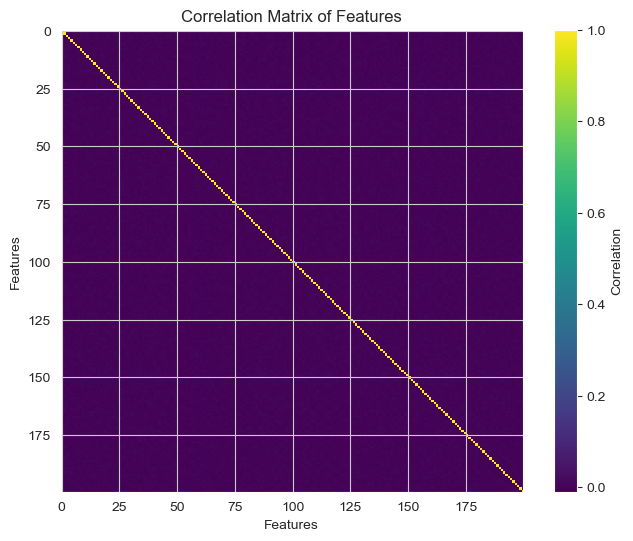

In [25]:
# this code to select the features and remove the features that have low variance
# to show the correlation matrix of the features


# For example, you can scale your features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# You can also use variance thresholding to remove low-variance features
selector = VarianceThreshold()
X_selected = selector.fit_transform(X_scaled)

# Step 3: Compute the correlation matrix
cov_matrix = EmpiricalCovariance().fit(X_selected).covariance_

# Step 4: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig(f'./images/data_analysis/correlation_matrix_of_all_features.png',
                dpi=300, bbox_inches='tight')
plt.show()


It's noticed that the features are independent of each other.

In [26]:
X_selected.shape

(200000, 200)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# create a simple model to predict the target variable
logistic_model = LogisticRegression().fit(X_train, y_train)

cv_results = cross_validate(logistic_model, X_train, y_train, cv=10, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.9145687499999999
f1_macro:  0.6703441220480588
f1_micro:  0.9145687499999999


In [21]:
# read the test data

logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

print("Classification Report:")
print(classification_report(y_test, logistic_predictions))

# import the weighted avergae f1 score
print('f1 score: ', f1_score(y_test, logistic_predictions, average='weighted'))


Logistic Regression Accuracy: 0.9131
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000

f1 score:  0.8953594884607815
